In [183]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [184]:
#loading test image
image = cv2.imread('images/answer_sheet_four.jpg')

## Preprocessing

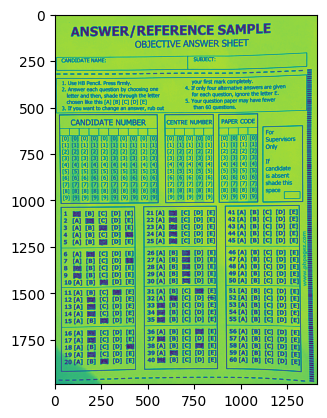

In [185]:
#converting to gray scale
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(image_gray)

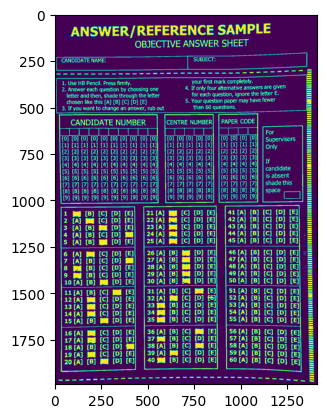

In [186]:
image_noise_reduction = cv2.GaussianBlur(image_gray, (5,5), 1)
_, binary = cv2.threshold(image_noise_reduction, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
plt.imshow(binary)

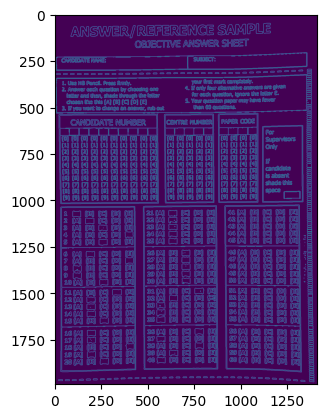

In [187]:
image_edges = cv2.Canny(binary, 10, 50)
plt.imshow(image_edges)

In [188]:
img_contours = image.copy()
contours, hierarchy = cv2.findContours(image_edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

In [189]:
cv2.drawContours(img_contours, contours, -1, (0, 255, 0), 10)

array([[[199, 211, 213],
        [200, 212, 214],
        [201, 213, 215],
        ...,
        [205, 215, 222],
        [206, 216, 223],
        [203, 215, 221]],

       [[200, 212, 214],
        [201, 213, 215],
        [201, 213, 215],
        ...,
        [205, 215, 222],
        [205, 215, 222],
        [202, 214, 220]],

       [[200, 212, 214],
        [201, 213, 215],
        [201, 213, 215],
        ...,
        [205, 215, 222],
        [203, 213, 220],
        [201, 213, 219]],

       ...,

       [[151, 153, 153],
        [154, 156, 156],
        [154, 156, 156],
        ...,
        [179, 189, 196],
        [182, 192, 199],
        [176, 188, 194]],

       [[151, 153, 153],
        [152, 154, 154],
        [151, 153, 153],
        ...,
        [179, 189, 196],
        [182, 192, 199],
        [176, 188, 194]],

       [[148, 150, 150],
        [148, 150, 150],
        [146, 148, 148],
        ...,
        [178, 188, 195],
        [180, 190, 197],
        [175, 187, 193]]

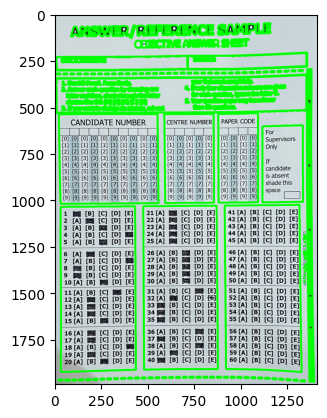

In [190]:
plt.imshow(img_contours)

In [191]:

def rectangle_contour(contours):
    rect_contours = []
    for i in contours:
        area = cv2.contourArea(i)
        if area>100:
            peri = cv2.arcLength(i, True)
            approx = cv2.approxPolyDP(i, 0.02*peri, True)
            if len(approx) == 4:
                rect_contours.append(i)

    rect_contours = sorted(rect_contours, key=cv2.contourArea, reverse=True)
    return rect_contours

rectCon = rectangle_contour(contours)


In [192]:
def getCornerPoints(cont):
    peri = cv2.arcLength(cont, True)
    approx = cv2.approxPolyDP(cont, 0.02*peri, True)
    
    return approx

In [211]:
def reorder(myPoints):
    myPoints = myPoints.reshape((4,2))
    myPointsNew = np.zeros((4,1,2), np.int32)
    add = myPoints.sum(axis=1)
    myPointsNew[0] = myPoints[np.argmin(add)]
    myPointsNew[3] = myPoints[np.argmin(add)]
    diff = np.diff(myPoints, axis=1)
    myPointsNew[1] = myPoints[np.argmin(diff)]
    myPointsNew[2] = myPoints[np.argmin(diff)]

    return myPointsNew
    


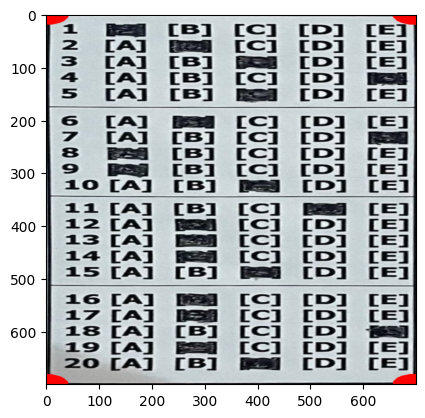

In [250]:
answered_objectives = getCornerPoints(rectCon[1])
img_answered = image.copy()

widthImg = 700
heightImg = 700

if answered_objectives.size != 0:
    cv2.drawContours(img_answered, answered_objectives, -1, (255, 0, 0), 50)
    reorder(answered_objectives)

    pt1 = np.float32(answered_objectives)
    pt2 = np.float32([[0,0], [widthImg, 0], [widthImg, heightImg], [0,heightImg]])

    matrix = cv2.getPerspectiveTransform(pt1, pt2)
    imgWarp = cv2.warpPerspective(img_answered, matrix, (700, 700))
    imgFlipped = cv2.flip(imgWarp, 1)

plt.imshow(imgFlipped)

In [237]:
answered_objectives

array([[[ 428, 1034]],

       [[  30, 1039]],

       [[  31, 1923]],

       [[ 434, 1913]]], dtype=int32)